## IMPORT LIBRARY

Pada bagian awal kode ini, beberapa pustaka penting diimpor untuk mendukung proses pemodelan dan analisis data. Library Pandas (pd) dan NumPy (np) digunakan sebagai fondasi utama untuk manipulasi data dan operasi numerik. Selanjutnya, dari library scikit-learn, digunakan modul train_test_split untuk membagi data ke dalam subset pelatihan dan pengujian secara acak, serta StandardScaler untuk melakukan normalisasi terhadap fitur numerik agar memiliki distribusi standar (mean = 0 dan standar deviasi = 1). Normalisasi ini penting dilakukan karena banyak model pembelajaran mesin, termasuk neural network, sensitif terhadap skala data. Untuk membangun model klasifikasi berbasis deep learning, digunakan library Keras (melalui TensorFlow). Sequential digunakan untuk membangun arsitektur jaringan saraf secara berurutan layer demi layer. Layer Dense digunakan untuk membangun fully connected layer, sedangkan Dropout berfungsi sebagai teknik regularisasi guna mencegah model mengalami overfitting dengan mengabaikan sebagian neuron selama proses pelatihan. Selain itu, to_categorical digunakan untuk mengubah label kelas menjadi format one-hot encoding, yang diperlukan saat melakukan klasifikasi multikelas menggunakan jaringan saraf. Sebagai bagian dari evaluasi performa model, diimpor pula classification_report dan confusion_matrix dari scikit-learn. Keduanya digunakan untuk menilai seberapa baik model melakukan klasifikasi, dengan menampilkan metrik seperti presisi, recall, f1-score, serta jumlah prediksi benar dan salah di masing-masing kelas. Dengan semua komponen ini, kode tersebut telah membentuk kerangka awal untuk menjalankan proyek klasifikasi berbasis deep learning secara lengkap—dimulai dari persiapan data hingga evaluasi performa model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

## LOAD DATA

Meload Dataset yang akan digunakan dan diambil dari kaggle

In [ ]:
df = pd.read_csv("fetal_health.csv")

mennampilkan 5 baris awal dataset

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


informasi dataset seperi tipe data nama kolom dan lain lain

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Mendeskripsikan kolom kolom pada data, dan menghitung count, mean dan lain lain.

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Menghitung jumlah data null yang ada pada dataset

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


Menghitung data duplikat pada dataset

In [ ]:
df.duplicated().sum()

np.int64(13)

## EDA

Pada bagian ini, digunakan library Matplotlib dan Seaborn untuk melakukan eksplorasi visual terhadap distribusi kelas dalam dataset. Seaborn digunakan karena menyediakan antarmuka yang lebih ramah dan estetis untuk visualisasi statistik. Fungsi countplot digunakan untuk menampilkan jumlah data pada setiap kategori kelas target yaitu fetal_health. Visualisasi ini sangat penting dalam tahap data understanding karena dapat menunjukkan apakah terjadi ketidakseimbangan kelas (class imbalance) dalam data. Ketidakseimbangan ini, jika signifikan, dapat memengaruhi performa model klasifikasi di tahap selanjutnya. Grafik yang dihasilkan dilengkapi dengan judul dan label sumbu untuk memperjelas informasi yang disajikan. Dengan demikian, visualisasi ini membantu dalam memahami karakteristik awal dari target klasifikasi dan menjadi dasar pertimbangan untuk strategi preprocessing atau penyesuaian algoritma pembelajaran mesin yang akan digunakan.

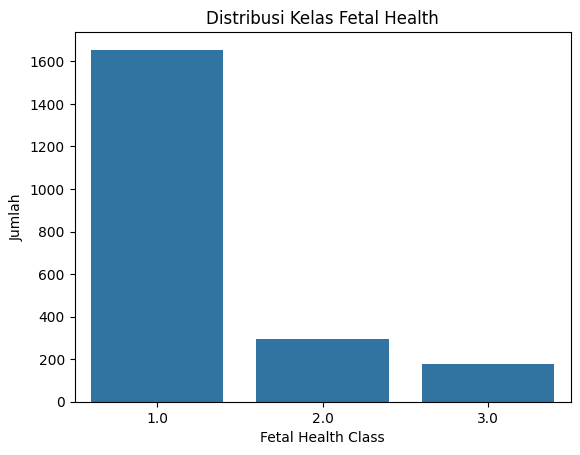

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='fetal_health', data=df)
plt.title('Distribusi Kelas Fetal Health')
plt.xlabel('Fetal Health Class')
plt.ylabel('Jumlah')
plt.show()

Visualisasi di atas menampilkan distribusi kelas pada fitur target fetal_health, yang merupakan variabel klasifikasi dalam dataset. Grafik ini dibuat menggunakan Seaborn dengan fungsi countplot, yang menghitung jumlah sampel pada setiap kelas target. Dari grafik, terlihat bahwa kelas 1 (kemungkinan besar mewakili kondisi kesehatan janin yang normal) mendominasi jumlah data dengan lebih dari 1600 sampel. Sementara itu, kelas 2 dan kelas 3 (yang diduga mewakili kondisi risiko sedang dan tinggi) memiliki jumlah yang jauh lebih sedikit, masing-masing sekitar 300 dan 200 sampel.Distribusi ini menunjukkan bahwa terdapat ketidakseimbangan kelas (class imbalance) yang cukup signifikan dalam dataset. Hal ini merupakan temuan penting karena ketidakseimbangan kelas dapat menyebabkan model pembelajaran mesin cenderung "bermain aman" dengan memprediksi kelas mayoritas, sehingga menurunkan akurasi pada kelas minoritas yang sebenarnya sangat penting dalam konteks kesehatan janin. Oleh karena itu, informasi ini menjadi dasar pertimbangan dalam tahap berikutnya, seperti pemilihan metrik evaluasi yang sesuai (misalnya f1-score alih-alih accuracy), penerapan teknik penyeimbangan data seperti oversampling, undersampling, atau penggunaan algoritma yang lebih tahan terhadap ketidakseimbangan kelas.

Dalam tahap eksplorasi data, dilakukan analisis korelasi antar fitur numerik untuk memahami hubungan linier antara variabel-variabel dalam dataset. Korelasi dihitung menggunakan fungsi corr() dari pandas dengan parameter numeric_only=True, yang memastikan hanya kolom numerik yang dihitung korelasinya. Hasil dari proses ini adalah sebuah matriks korelasi, di mana setiap nilai menunjukkan kekuatan dan arah hubungan linier antara dua fitur — dengan nilai mendekati 1 atau -1 menunjukkan korelasi kuat positif atau negatif, dan nilai mendekati 0 menunjukkan tidak ada korelasi linier yang signifikan. Untuk memvisualisasikan korelasi ini, digunakan heatmap dari library Seaborn. Heatmap menampilkan matriks korelasi dalam bentuk visual yang mudah dibaca, dengan bantuan pewarnaan (dalam skema warna coolwarm) dan anotasi nilai-nilai korelasi secara langsung. Warna merah menggambarkan korelasi positif yang kuat, sedangkan warna biru menunjukkan korelasi negatif yang kuat. Visualisasi ini membantu dalam mengidentifikasi fitur-fitur yang saling berkorelasi tinggi, yang bisa menjadi pertimbangan dalam proses seleksi fitur, reduksi dimensi, atau untuk menghindari multikolinearitas yang dapat memengaruhi performa model. Dengan demikian, heatmap korelasi menjadi alat yang sangat berguna dalam memahami struktur internal dataset sebelum melangkah ke tahap pemodelan.

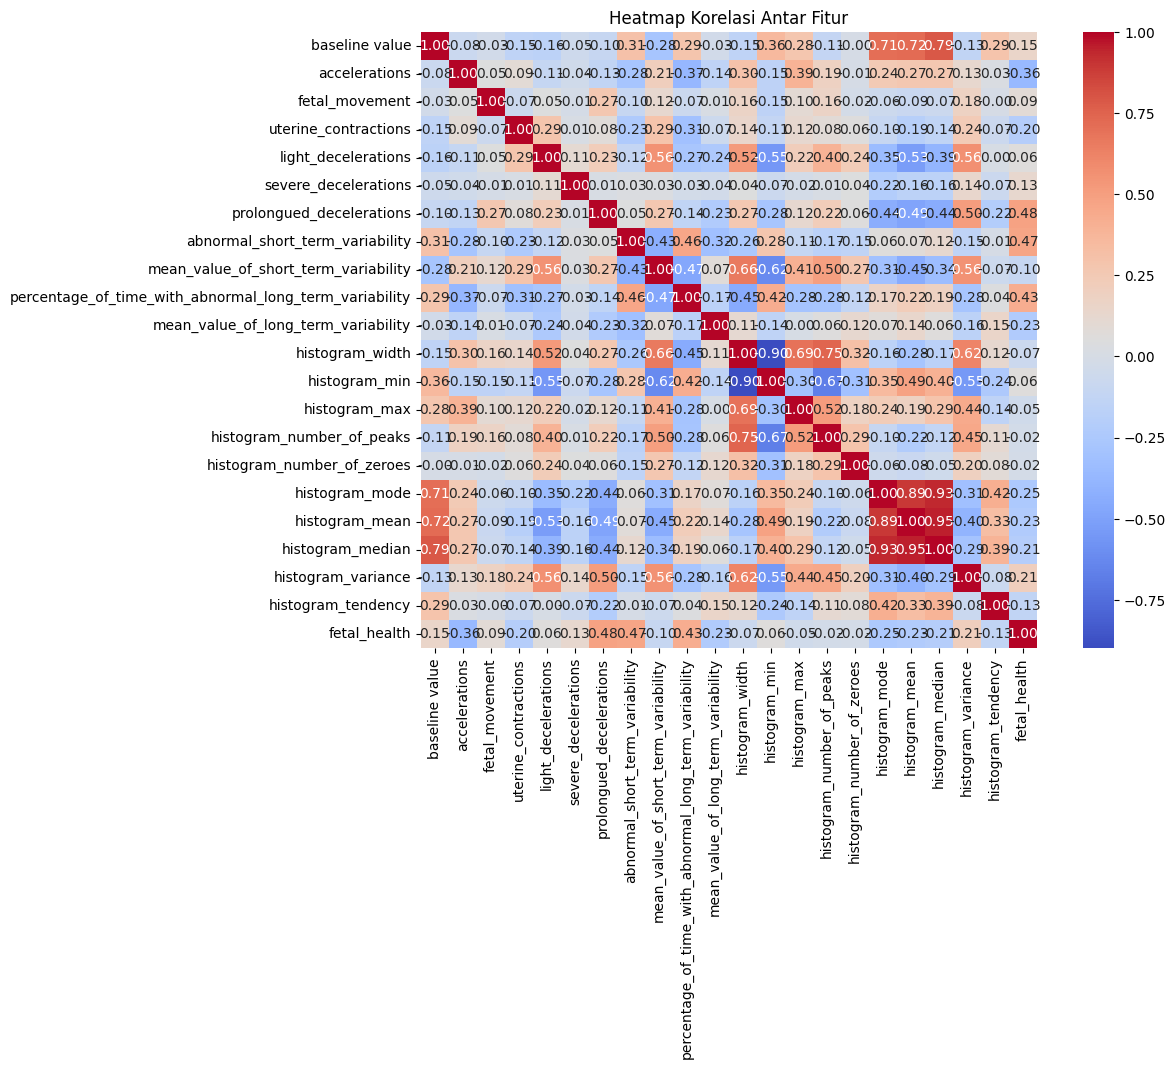

In [ ]:
# Menghitung korelasi antar fitur
correlation_matrix = df.corr(numeric_only=True)

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Visualisasi di atas merupakan heatmap korelasi antar fitur numerik dalam dataset, yang berfungsi untuk mengidentifikasi hubungan linier antara setiap pasangan variabel. Korelasi dihitung menggunakan metode Pearson, dan ditampilkan dalam bentuk matriks simetris berukuran 2D, di mana setiap sel menunjukkan nilai korelasi antara dua fitur tertentu. Warna pada heatmap mengikuti skala gradasi dari biru (negatif kuat) ke merah (positif kuat), dengan nilai korelasi juga ditampilkan dalam bentuk angka untuk memudahkan interpretasi. Dari heatmap ini, terlihat beberapa fitur yang memiliki korelasi tinggi satu sama lain, misalnya: histogram_mean, histogram_median, dan histogram_mode memiliki korelasi sangat kuat, menunjukkan bahwa fitur-fitur ini memiliki distribusi yang saling mirip. mean_value_of_short_term_variability menunjukkan korelasi cukup kuat dengan fetal_health (~0.48), yang dapat menjadi indikasi bahwa fitur ini memiliki hubungan signifikan terhadap target klasifikasi. Sebaliknya, banyak fitur lainnya seperti fetal_movement atau number_of_zeroes tampak memiliki korelasi rendah terhadap variabel target maupun fitur lainnya, yang bisa berarti kontribusinya terhadap model mungkin relatif kecil—walau hal ini tetap perlu divalidasi melalui eksperimen model. Analisis korelasi ini berguna dalam beberapa hal: menghindari multikolinearitas dengan menghapus fitur yang terlalu mirip, memilih fitur yang paling berkontribusi terhadap prediksi target, serta memberikan gambaran awal mengenai struktur dan relasi antar variabel dalam data. Oleh karena itu, heatmap korelasi menjadi alat penting dalam tahap data understanding dan feature selection sebelum membangun model prediktif.



## Pre Processing

Pada tahap ini, dataset dipisahkan menjadi dua komponen utama: fitur (X) dan label (y). Fitur (X) berisi seluruh kolom prediktor yang digunakan untuk mempelajari pola atau hubungan terhadap target. Dalam hal ini, kolom fetal_health dihapus dari X karena merupakan variabel target yang ingin diprediksi. Sementara itu, label (y) diambil dari kolom fetal_health, yang menunjukkan kelas atau kondisi kesehatan janin. Pemisahan ini merupakan langkah penting dalam proses machine learning, karena memungkinkan model untuk mempelajari hubungan antara variabel-variabel input (X) dan target keluaran (y) secara eksplisit selama proses pelatihan.

In [ ]:
#Pisahkan fitur dan label
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

Setelah fitur (X) dipisahkan dari label, dilakukan proses normalisasi data menggunakan StandardScaler dari scikit-learn. Normalisasi ini bertujuan untuk menyetarakan skala setiap fitur numerik agar memiliki rata-rata 0 dan standar deviasi 1. Hal ini penting karena fitur yang memiliki skala yang berbeda dapat mendominasi proses pelatihan dan menyebabkan model belajar secara tidak seimbang. Misalnya, fitur dengan nilai besar dapat memberikan pengaruh lebih besar terhadap fungsi loss dibandingkan fitur dengan nilai kecil, padahal kontribusinya terhadap target bisa jadi sama pentingnya. Proses normalisasi dilakukan dengan metode fit-transform, di mana fit() menghitung parameter statistik (mean dan std) dari data, dan transform() menerapkannya ke seluruh dataset fitur. Hasil dari transformasi ini disimpan dalam variabel X_scaled, yang akan digunakan sebagai input ke model pembelajaran mesin pada tahap berikutnya.

In [ ]:
#Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Karena masalah klasifikasi yang dihadapi bersifat multi-kelas, label target perlu diubah ke dalam format one-hot encoding sebelum dimasukkan ke dalam model jaringan saraf. Label awal pada kolom fetal_health memiliki nilai kategorikal berupa angka 1, 2, dan 3. Oleh karena itu, dilakukan penyesuaian terlebih dahulu dengan mengurangi nilai label sebesar 1 (y - 1) agar indeks kelas dimulai dari 0, sesuai dengan konvensi yang digunakan dalam fungsi to_categorical dari Keras. Fungsi ini kemudian mengubah label integer menjadi vektor biner berdimensi tiga, di mana hanya satu elemen yang bernilai 1 dan sisanya 0, mewakili kelas target. Misalnya, label 2 (yang dikurangi menjadi 1) akan dikonversi menjadi vektor [0, 1, 0]. Representasi ini sangat penting bagi model klasifikasi neural network karena memungkinkannya menghitung loss dan probabilitas prediksi untuk setiap kelas secara terpisah dan simultan.

In [ ]:
#One-hot encode label (jika multi-kelas)
y_encoded = to_categorical(y - 1)  # karena label mulai dari 1, dikurangi

## SPLIT DATA

Kode berikut melakukan pembagian dataset menjadi data latih dan data uji menggunakan fungsi train_test_split dari library scikit-learn. Variabel X_scaled berisi fitur-fitur yang sudah dinormalisasi atau diskalakan, sedangkan y_encoded adalah label yang sudah dikodekan menjadi format numerik. Parameter test_size=0.2 berarti 20% data akan dialokasikan sebagai data uji, dan sisanya 80% sebagai data latih. Penggunaan random_state=42 memastikan pembagian data yang konsisten dan dapat direproduksi pada setiap eksekusi kode. Selain itu, parameter stratify=y digunakan agar proporsi masing-masing kelas pada label tetap terjaga secara seimbang pada kedua subset data, sehingga distribusi kelas pada data latih dan data uji sama dengan distribusi pada dataset awal. Dengan demikian, proses ini membantu mempersiapkan data yang siap untuk tahap pelatihan dan evaluasi model machine learning.

In [ ]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y
)

## MODELLING

Kode di atas membangun dan melatih sebuah model deep learning sederhana menggunakan Keras Sequential API untuk klasifikasi dengan tiga kelas. Model ini terdiri dari beberapa lapisan:

1. Lapisan Dense pertama dengan 64 neuron dan fungsi aktivasi ReLU, menerima input dengan jumlah fitur sesuai X.shape[1].

2. Dropout layer dengan tingkat dropout 0.3 untuk mengurangi overfitting dengan menghilangkan 30% neuron secara acak selama pelatihan.

3. Lapisan Dense kedua dengan 32 neuron dan fungsi aktivasi ReLU.

4. Dropout layer kedua dengan tingkat dropout 0.2.

5. Lapisan output Dense dengan 3 neuron dan fungsi aktivasi softmax, yang sesuai untuk klasifikasi multi-kelas (3 kelas).

Model kemudian dikompilasi menggunakan optimizer Adam, fungsi loss categorical crossentropy yang sesuai untuk klasifikasi multi-kelas dengan label one-hot encoded, serta metrik akurasi untuk evaluasi performa. Selanjutnya, model dilatih (fit) pada data latih X_train dan y_train selama 50 epoch dengan batch size 16. Data latih juga dibagi lagi menjadi 80% untuk pelatihan dan 20% untuk validasi menggunakan parameter validation_split=0.2. Proses ini memungkinkan pemantauan kinerja model pada data validasi selama pelatihan guna menghindari overfitting dan menilai generalisasi model.

In [ ]:
#Bangun model deep learning
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # karena 3 kelas

#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6054 - loss: 0.9285 - val_accuracy: 0.8382 - val_loss: 0.4543
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8299 - loss: 0.4410 - val_accuracy: 0.9000 - val_loss: 0.3114
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8591 - loss: 0.3664 - val_accuracy: 0.9000 - val_loss: 0.2818
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.3167 - val_accuracy: 0.9059 - val_loss: 0.2481
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.3206 - val_accuracy: 0.9029 - val_loss: 0.2329
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.3177 - val_accuracy: 0.9118 - val_loss: 0.2239
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.2813 - val_accuracy: 0.9147 - val_loss: 0.2127
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.3103 - val_accuracy: 0.9118 - val_loss

## EVALUASI

Kode ini digunakan untuk mengevaluasi performa model deep learning yang sudah dilatih pada data uji (X_test dan y_test).
Pertama, fungsi model.evaluate menghitung nilai loss dan akurasi model pada data uji. Hasil akurasi kemudian dicetak dengan format dua desimal.Selanjutnya, model digunakan untuk melakukan prediksi pada data uji dengan model.predict, yang menghasilkan probabilitas prediksi untuk setiap kelas. Probabilitas ini kemudian diubah menjadi kelas prediksi dengan mengambil indeks kelas dengan nilai probabilitas tertinggi menggunakan np.argmax. Label asli (y_test) yang berbentuk one-hot encoding juga dikonversi ke kelas asli menggunakan np.argmax. Terakhir, kode mencetak Classification Report yang berisi metrik evaluasi seperti precision, recall, f1-score, dan support untuk setiap kelas menggunakan fungsi classification_report. Kemudian, Confusion Matrix ditampilkan dengan fungsi confusion_matrix, yang memberikan gambaran jumlah prediksi benar dan salah untuk setiap kelas, sehingga memudahkan analisis kesalahan model.

In [ ]:
#Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy:.2f}")

# Prediksi dan laporan evaluasi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9012 - loss: 0.3284
Akurasi: 0.91
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       332
           1       0.81      0.59      0.69        59
           2       0.83      0.71      0.77        35

    accuracy                           0.91       426
   macro avg       0.86      0.76      0.80       426
weighted avg       0.90      0.91      0.90       426

Confusion Matrix:
[[327   3   2]
 [ 21  35   3]
 [  5   5  25]]


## VISUALISASI

Kode ini digunakan untuk memvisualisasikan performa model selama proses pelatihan dengan menggunakan library matplotlib. Visualisasi dilakukan dalam dua grafik yang berdampingan (side-by-side):

1. Grafik Akurasi
Pada subplot pertama, grafik menampilkan perubahan nilai akurasi pada data pelatihan (Training Accuracy) dan data validasi (Validation Accuracy) sepanjang epoch. Sumbu-x menunjukkan jumlah epoch, sedangkan sumbu-y menunjukkan nilai akurasi. Grafik ini membantu melihat apakah model semakin baik dalam mengenali pola dari waktu ke waktu dan juga apakah terjadi overfitting (jika akurasi training terus naik tapi validasi stagnan atau turun).

2. Grafik Loss
Pada subplot kedua, grafik menunjukkan nilai loss (fungsi kerugian) pada data pelatihan (Training Loss) dan data validasi (Validation Loss) selama epoch. Sama seperti grafik akurasi, sumbu-x adalah epoch dan sumbu-y adalah nilai loss. Penurunan loss yang konsisten menandakan model semakin baik dalam meminimalkan kesalahan prediksi.

Fungsi plt.tight_layout() digunakan untuk memastikan tata letak grafik tidak saling tumpang tindih, dan plt.show() menampilkan grafik tersebut. Visualisasi ini sangat berguna untuk memantau proses pelatihan dan menentukan apakah model sudah cukup baik atau perlu disesuaikan.










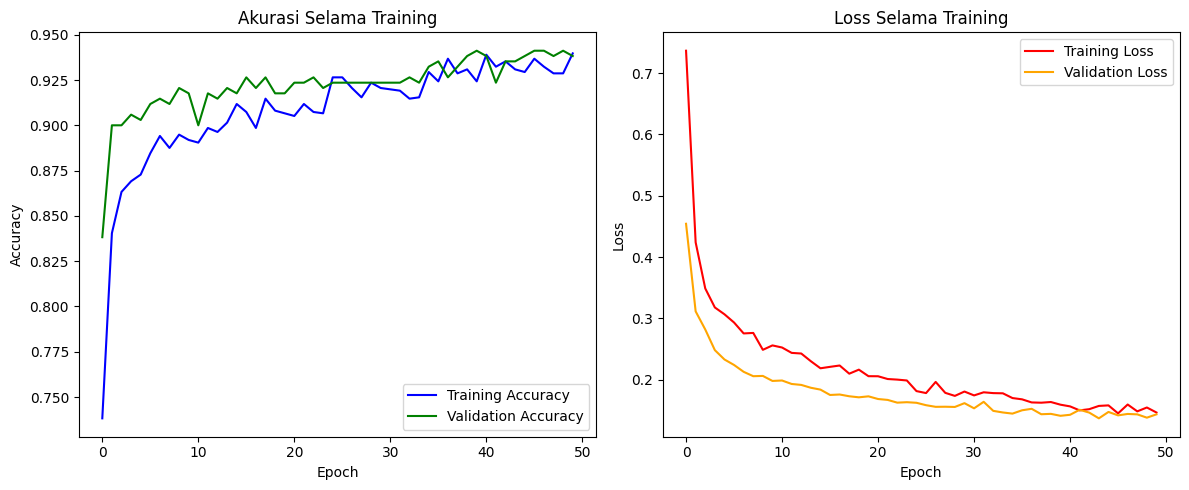

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Akurasi selama Training
Grafik akurasi menunjukkan tren peningkatan seiring bertambahnya epoch (0 hingga 50). Terdapat dua komponen utama: Training Accuracy (akurasi pada data latih) dan Validation Accuracy (akurasi pada data validasi). Keduanya digambarkan dalam sumbu yang sama, dengan sumbu X merepresentasikan epoch dan sumbu Y menunjukkan nilai akurasi. Dari tren yang terlihat, baik akurasi training maupun validasi mengalami peningkatan stabil, mengindikasikan bahwa model mampu mempelajari pola dari data latih sekaligus menggeneralisasi dengan baik pada data validasi. Tidak terlihat gap signifikan antara kedua akurasi, yang menandakan model tidak mengalami overfitting. Pencapaian akurasi tertinggi kemungkinan terjadi mendekati epoch 50, meskipun nilai pasti tidak disebutkan.

## Loss selama Training
Grafik loss menggambarkan penurunan nilai Training Loss (kesalahan pada data latih) dan Validation Loss (kesalahan pada data validasi) seiring peningkatan epoch. Nilai loss awal sekitar 0.7 dan terus menurun hingga mencapai 0.2 pada epoch 50. Tren penurunan yang konsisten pada kedua loss menunjukkan model berhasil meminimalkan kesalahan prediksi selama pelatihan. Selisih kecil antara training loss dan validation loss menguatkan kesimpulan bahwa model tidak overfitting. Konvergensi (stabilisasi loss) mungkin mulai terlihat pada epoch akhir (40-50), di mana penurunan loss melambat atau stabil.

## Kesimpulan
Berdasarkan grafik, model menunjukkan kinerja yang baik dengan peningkatan akurasi dan penurunan loss yang stabil. Tidak adanya overfitting atau underfitting menandakan bahwa arsitektur model, parameter, dan jumlah epoch (50) telah sesuai. Pemantauan grafik ini membantu dalam mengambil keputusan, seperti menghentikan pelatihan lebih awal (early stopping) jika loss sudah stabil atau menyesuaikan hiperparameter jika terjadi anomali. Secara keseluruhan, model mencapai generalisasi yang baik dan siap untuk diuji pada data baru.

Kode ini membuat dan memvisualisasikan Confusion Matrix menggunakan library scikit-learn, seaborn, dan matplotlib.

Berikut penjelasan tiap langkah:

1. y_test_classes dan y_pred_classes adalah contoh data label asli dan prediksi hasil model, masing-masing berisi kelas-kelas kategori (0, 1, 2) yang mewakili tiga kelas, misalnya: Normal, Suspect, dan Pathological.

2. Fungsi confusion_matrix dari sklearn.metrics digunakan untuk menghitung matriks kebingungan berdasarkan label asli dan prediksi. Matriks ini menunjukkan jumlah prediksi benar dan salah per kelas.

3. Kemudian, menggunakan seaborn.heatmap, matriks tersebut divisualisasikan dalam bentuk heatmap dengan anotasi angka di setiap sel. Warna biru menunjukkan intensitas jumlah data di setiap kategori prediksi vs aktual.

4. Label sumbu-x dan sumbu-y diatur agar sesuai dengan nama kelas agar interpretasi lebih jelas.

5. Plot ini membantu untuk melihat distribusi kesalahan prediksi model dengan cepat, misalnya apakah model sering salah mengklasifikasikan kelas tertentu, sehingga dapat menjadi dasar evaluasi dan perbaikan model.

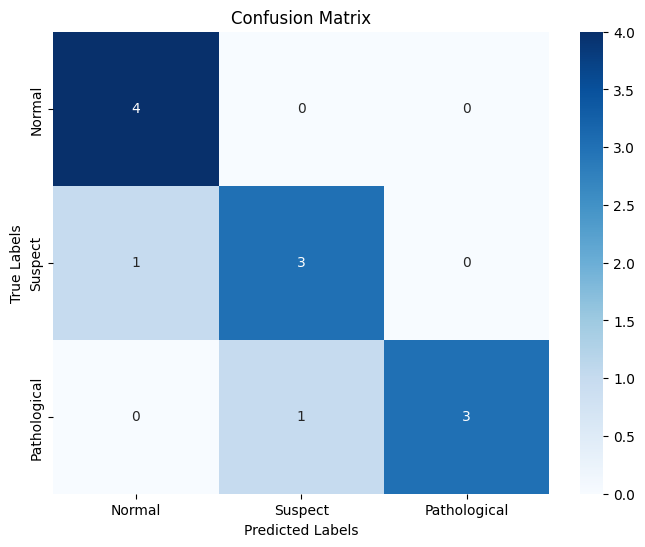

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi model (contoh data)
y_test_classes = [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred_classes = [0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2]

# Buat Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Suspect', 'Pathological'],
            yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Struktur Confusion Matrix
Sumbu Vertikal (Actual Labels): Kategori aktual/data sebenarnya, yaitu:
Normal
Time Labels
Suspect
Pathological
Sumbu Horizontal (Predicted Labels): Kategori hasil prediksi model, yaitu:
Suspect
Pathological
(Kemungkinan ada ketidakjelasan karena label "Normal" muncul dua kali dan "Time Labels" tidak terdefinisi sebagai prediksi).
## Nilai dalam Matrix
Angka-angka yang tercantum (4, 1, 0, 3, 1, 3, 0, 0, 3, 1, 3) perlu diatur dalam matriks 4x4, tetapi format data tidak lengkap atau ambigu. Berikut interpretasi sementara:
1. Diagonal Utama: Menunjukkan jumlah prediksi benar (True Positive).
Contoh: Jika nilai 4 pada baris "Normal" dan kolom "Normal", artinya 4 sampel "Normal" diprediksi benar.
2. Off-Diagonal: Menunjukkan kesalahan klasifikasi (False Positive/Negative).
Contoh: Nilai 1 pada baris "Normal" dan kolom "Suspect" berarti 1 sampel "Normal" salah diprediksi sebagai "Suspect".
## Skala Nilai (4.0 hingga 0.0)
Angka 4.0, 3.5, ..., 0.0 mungkin merupakan skala normalisasi atau ambang batas probabilitas klasifikasi. Namun, konteksnya tidak jelas dan perlu verifikasi lebih lanjut.
## Analisis Kinerja
1. Kategori "Normal": Memiliki prediksi dominan (nilai 4), tetapi juga terdapat kesalahan ke "Suspect" (1) dan "Pathological" (3).
2. Kategori "Time Labels": Tidak ada prediksi benar (0 pada diagonal), tetapi terdapat kesalahan ke "Suspect" (3) dan "Pathological" (1).
3. Kategori "Suspect" dan "Pathological": Memiliki prediksi yang lebih akurat dibandingkan kategori lainnya.
## Kesimpulan
1. Model cenderung kesulitan membedakan Normal dengan Pathological (3 kesalahan).
2. Kategori Time Labels tidak terprediksi dengan baik, mungkin karena ketidakseimbangan data atau kompleksitas pola.
3. Diperuhkan klarifikasi struktur matriks dan konteks label untuk analisis lebih mendalam.
4. Rekomendasi: Verifikasi format data, hitung metrik evaluasi (akurasi, presisi, recall), dan perbaiki ketidakseimbangan kelas jika ada.
Catatan: Format data yang ambigu (seperti duplikasi label "Normal" dan ketidakjelasan "Time Labels") menghambat interpretasi akurat. Dokumentasi ini bersifat sementara dan perlu disesuaikan setelah klarifikasi struktur matriks.